<a href="https://colab.research.google.com/github/yjb-git/colab/blob/main/Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
dog_path = "/content/drive/MyDrive/mountain.jpg"

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
img = cv2.imread(dog_path)

In [34]:
def show_img(img) :
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Image showed")
  plt.show()

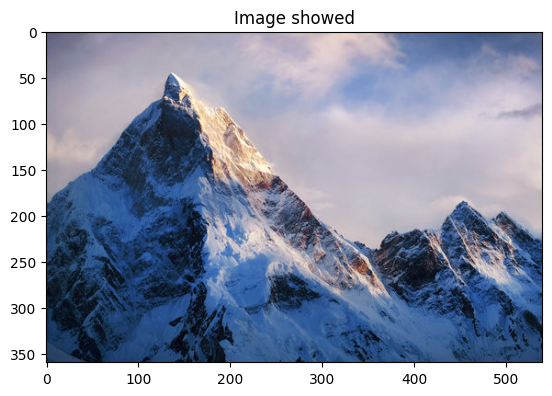

In [35]:
show_img(img)

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [38]:
gray_f = gray.astype(np.float32)
gray_f.shape

(360, 540)

In [39]:
Ix = cv2.Sobel(gray_f, cv2.CV_32F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray_f, cv2.CV_32F, 0, 1, ksize=3)

In [41]:
Ix2 = Ix*Ix
Iy2 = Iy*Iy
Ixy = Ix*Iy

In [42]:
A11 = cv2.GaussianBlur(Ix2, (3,3), 1.0)
A22 = cv2.GaussianBlur(Iy2, (3,3), 1.0)
A12 = cv2.GaussianBlur(Ixy, (3,3), 1.0)

# Harris response
$$ \lambda_0\lambda_1-\alpha(\lambda_0+\lambda_1)^2\\
= \det(A)-\alpha \text{trace}(A)^2$$

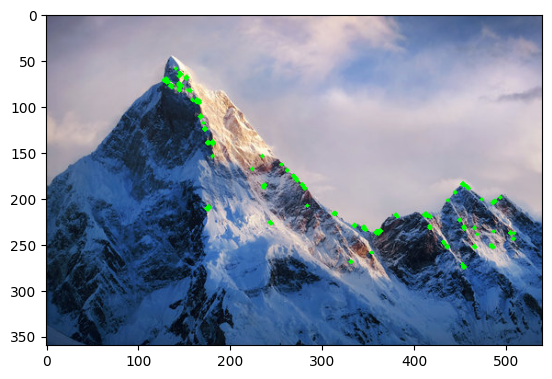

In [50]:
alpha = 0.06
harris = A11*A22 - A12*A12 - alpha*(A11+A22)**2
vis = img.copy()
H = harris.copy()
Rnorm = cv2.normalize(H, None, 0, 1, cv2.NORM_MINMAX)
th = 0.57
ys, xs = np.where(Rnorm > th)
for (x, y) in zip(xs, ys):
    cv2.circle(vis, (x, y), 2, (0, 255, 0), -1)  # purple dot

# plt img show
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))

In [79]:
import numpy as np
import plotly.graph_objects as go

def plot_autocorr_quadratic(A11, A22, A12, x, y, r=10):
    a11 = float(A11[y, x])
    a22 = float(A22[y, x])
    a12 = float(A12[y, x])

    du = np.arange(-r, r+1)
    dv = np.arange(-r, r+1)
    DU, DV = np.meshgrid(du, dv)

    E =  a11*DU**2 + 2*a12*DU*DV + a22*DV**2

    fig = go.Figure(data=[go.Surface(x=DU, y=DV, z=E)])
    fig.update_layout(
        title=f"Quadratic autocorrelation surface @ (x={x}, y={y})",
        scene=dict(xaxis_title="Δx", yaxis_title="Δy", zaxis_title="E"),
        height=600
    )
    fig.show()

# 예시:


In [83]:
import plotly.express as px
import numpy as np

def plot_harris_heatmap(harris):
    # 보기 좋게 log 압축 추천 (큰 값 쏠림 완화)
    H = harris.astype(np.float32)
    Hn = (H - H.min()) / (H.max() - H.min() + 1e-12)
    Hlog = np.log1p(10 * Hn)  # 대충 압축

    fig = px.imshow(Hlog, origin="upper", title="Harris response (log-scaled)")
    fig.update_layout(height=700)
    fig.show()

plot_harris_heatmap(harris)

In [81]:
plot_autocorr_quadratic(A11, A22, A12, x=151, y=322, r=5)
plot_autocorr_quadratic(A11, A22, A12, x=425, y=240, r=5)

# Brown Response
$$\frac{\lambda_0 \lambda_1}{\lambda_0+\lambda_1} \\
= \frac{\det A}{\text{tr} A} $$


/tmp/ipython-input-271/3061445183.py:3: RuntimeWarning:

invalid value encountered in divide



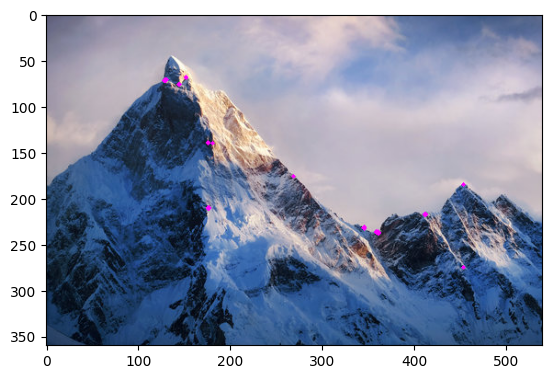

In [85]:
det = A11*A22 - A12*A12
tr = A11 + A22
brown = det / tr
vis = img.copy()
H = brown.copy()
Rnorm = cv2.normalize(H, None, 0, 1, cv2.NORM_MINMAX)
th = 0.57
ys, xs = np.where(Rnorm > th)
for (x, y) in zip(xs, ys):
    cv2.circle(vis, (x, y), 2, (255, 0, 255), -1)  # purple dot

# plt img show
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))